<a href="https://colab.research.google.com/github/Dhakal33/Factor-Analysis-of-Likert-Scale-Data/blob/main/Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Factor Analysis of Likert Scale Data**

This study aims to identify the factors influencing consumer buying behavior towards purchasing two-wheeler in the Nepalese market.

Please refer to this publication to understand the methodology employed to analyze the survey data.

Bhattarai, A., Dhakal, S., Gautam, Y., Bhattarai, N., Jha, B., & Sharma, U. (2022). Perception of safety culture in the Nepalese aviation industry: A factor analysis approach. Transportation Research Interdisciplinary Perspectives, 16, 100723. DOI: https://doi.org/10.1016/j.trip.2022.100723

In [102]:
# Import survey data
from google.colab import files
uploaded = files.upload()

Saving ConsumerBuyingBehavior_forGIT.xlsx to ConsumerBuyingBehavior_forGIT (2).xlsx


In [ ]:
# Install the library "factor_analyzer"
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=c72fcd5428fd3518cfb40eec38635211d0809ecc91c34777f3e0577f951017ed
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [103]:
# Import libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [105]:
df = pd.read_excel("ConsumerBuyingBehavior_forGIT (2).xlsx")
df.head()

,MinimalOperationCost,Storage,EasyHandling,HighPickup,EfficientBrakingSystem,AttractiveOuterBodyDesign,MobileAppConnectivity,EfficientCustomerService,EasyAvailabilityOfSpareParts,HighResaleValue
0,3,3,4,4,4,3,2,4,4,4
1,4,3,4,4,5,4,2,5,4,4
2,4,2,4,4,5,4,3,4,4,3
3,4,3,4,4,4,3,2,5,5,5
4,4,1,3,3,5,3,1,3,2,2


In [106]:
indVar = df.columns
indVar

Index(['MinimalOperationCost', 'Storage', 'EasyHandling', 'HighPickup',
       'EfficientBrakingSystem', 'AttractiveOuterBodyDesign',
       'MobileAppConnectivity', 'EfficientCustomerService',
       'EasyAvailabilityOfSpareParts', 'HighResaleValue'],
      dtype='object')

In [107]:
# Dropping unnecessary columns - Only including the factors with Likert scale data
# df.drop(['Gender', 'AgeGroup', 'EducationalDegree', 'Employment', 'MaritalStatus', 'AnnualEarning', 'LocalGovernment', 'DailyTravelDistance', 'RightInitialInvestment'],axis=1,inplace=True)

In [108]:
# Dropping missing values rows
df.dropna(inplace=True)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   MinimalOperationCost          237 non-null    int64
 1   Storage                       237 non-null    int64
 2   EasyHandling                  237 non-null    int64
 3   HighPickup                    237 non-null    int64
 4   EfficientBrakingSystem        237 non-null    int64
 5   AttractiveOuterBodyDesign     237 non-null    int64
 6   MobileAppConnectivity         237 non-null    int64
 7   EfficientCustomerService      237 non-null    int64
 8   EasyAvailabilityOfSpareParts  237 non-null    int64
 9   HighResaleValue               237 non-null    int64
dtypes: int64(10)
memory usage: 18.6 KB


# **Adequacy Test**
*To understand if our data is suitbale for exploratory factor analysis*

In [111]:
# Bartlett’s test of sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
chi_square_value, p_value

(330.51288323392373, 4.0127628470497245e-45)

In this Bartlett ’s test, the p-value is 0. Hence, the test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [112]:
# Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_overall, kmo_model = calculate_kmo(df)
kmo_model

0.6891620231139561

According to Tabachnick et al. (2007), a KMO of 0.60 or higher is required to apply factor analysis. Hence, it is appropriate to apply factor analytical techniques to this data set.

## **Exploratory Factor Analysis**

In [113]:
# Create factor analysis object and perform factor analysis
factorA = FactorAnalyzer()
factorA.fit(df)

# Check Eigenvalues
eigen_values, eigen_vectors = factorA.get_eigenvalues()
eigen_values

array([2.68844844, 1.30346949, 1.17550406, 1.02179137, 0.80277521,
       0.74440858, 0.67687576, 0.66388431, 0.47772338, 0.4451194 ])

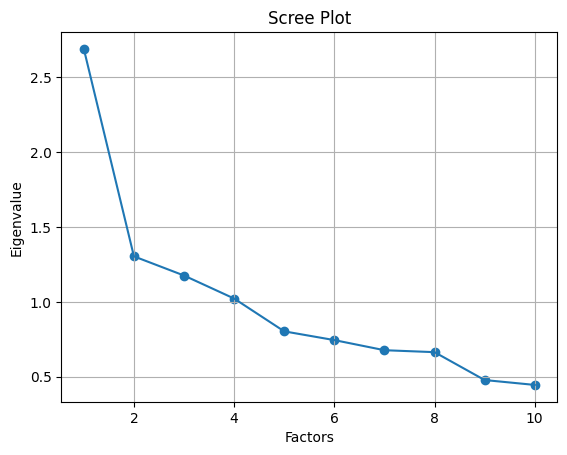

In [114]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

There are four factors with Eigen Values greater than 1. So, rerun the factor analyzer with four number of factors with varimax rotation to understand the factor loading.

In [115]:
fa = FactorAnalyzer()
fa.set_params(n_factors=4, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_

In [116]:
print(loadings)

[[ 7.78854093e-02 -5.77302958e-03  3.27940851e-01 -2.23212480e-01]
 [ 8.93152069e-02  4.23371782e-01  1.43153708e-01 -8.73246585e-02]
 [ 1.83169250e-01  9.05609700e-02  4.69467177e-01  7.88590431e-02]
 [ 9.00050791e-02  1.44265140e-01  5.67058863e-01  1.32424605e-01]
 [ 2.98584117e-02  9.84123543e-02  5.47800239e-01  7.64775783e-02]
 [ 1.13076649e-01  5.29727782e-02  2.15332819e-01  9.68718680e-01]
 [ 9.16860903e-02  8.44736786e-01  3.33687492e-02  1.44172947e-01]
 [ 4.02798701e-01  3.00377426e-01  2.57491314e-01  4.99661181e-02]
 [ 9.49845853e-01  9.87405814e-02  1.32291278e-01  9.10865499e-04]
 [ 3.13250484e-01  3.25009123e-01  1.02839226e-01  1.07234350e-01]]


In [117]:
# Get variance of each factors
fa.get_factor_variance()

(array([1.24035923, 1.13996929, 1.11193883, 1.06025162]),
 array([0.12403592, 0.11399693, 0.11119388, 0.10602516]),
 array([0.12403592, 0.23803285, 0.34922673, 0.4552519 ]))

1st Row: SS Loading

2nd Row: Proportional Variance

3rd Row: Cumulative Variance

The selected factors explain 45% of the variance in the dataset.

## **Post processing**

In [118]:
# Covnert numpy arrays to dataframe
loadings_df = pd.DataFrame({'Factor1': loadings[:, 0], 'Factor2': loadings[:, 1], 'Factor3': loadings[:, 2],'Factor4': loadings[:, 3]})
print(loadings_df)

    Factor1   Factor2   Factor3   Factor4
0  0.077885 -0.005773  0.327941 -0.223212
1  0.089315  0.423372  0.143154 -0.087325
2  0.183169  0.090561  0.469467  0.078859
3  0.090005  0.144265  0.567059  0.132425
4  0.029858  0.098412  0.547800  0.076478
5  0.113077  0.052973  0.215333  0.968719
6  0.091686  0.844737  0.033369  0.144173
7  0.402799  0.300377  0.257491  0.049966
8  0.949846  0.098741  0.132291  0.000911
9  0.313250  0.325009  0.102839  0.107234


In [119]:
loadings_df_gt_32 = np.argwhere(loadings_df.to_numpy()>=0.32).tolist()
print(loadings_df_gt_32)

[[0, 2], [1, 1], [2, 2], [3, 2], [4, 2], [5, 3], [6, 1], [7, 0], [8, 0], [9, 1]]


An arbitrarily chosen factor loading of 0.32 is selected as a filtering criteria to determine the practical importance of the factors.

In [120]:
loadings_df.style.applymap(lambda x: 'background-color : green' if x>0.32 else '')

,Factor1,Factor2,Factor3,Factor4
0,0.077885,-0.005773,0.327941,-0.223212
1,0.089315,0.423372,0.143154,-0.087325
2,0.183169,0.090561,0.469467,0.078859
3,0.090005,0.144265,0.567059,0.132425
4,0.029858,0.098412,0.547800,0.076478
5,0.113077,0.052973,0.215333,0.968719
6,0.091686,0.844737,0.033369,0.144173
7,0.402799,0.300377,0.257491,0.049966
8,0.949846,0.098741,0.132291,0.000911
9,0.313250,0.325009,0.102839,0.107234


In [121]:
# Insert a column in the dataframe to include original independent variables
loadings_df.insert(0, 'Independent Variables', indVar, True)
# loadings_df.set_index('Independent Variables')
print(loadings_df)

          Independent Variables   Factor1   Factor2   Factor3   Factor4
0          MinimalOperationCost  0.077885 -0.005773  0.327941 -0.223212
1                       Storage  0.089315  0.423372  0.143154 -0.087325
2                  EasyHandling  0.183169  0.090561  0.469467  0.078859
3                    HighPickup  0.090005  0.144265  0.567059  0.132425
4        EfficientBrakingSystem  0.029858  0.098412  0.547800  0.076478
5     AttractiveOuterBodyDesign  0.113077  0.052973  0.215333  0.968719
6         MobileAppConnectivity  0.091686  0.844737  0.033369  0.144173
7      EfficientCustomerService  0.402799  0.300377  0.257491  0.049966
8  EasyAvailabilityOfSpareParts  0.949846  0.098741  0.132291  0.000911
9               HighResaleValue  0.313250  0.325009  0.102839  0.107234


# **Conclusion**
Factor 1: Efficient Customer Service and Easy Availability Of Spare Parts  

Factor 2: Storage, Mobile App Connectivity, and High Resale Value

Factor 3: Minimal Operation Cost, Easy Handling, High Pickup, and Efficient Braking System

Factor 4: Attractive Outer Body Design

The survey respondents value efficient customer service and easy availability of spare parts over other variables considered in this study. Likewise, the outer body design is the least important factor determining the purchase decision of two-wheeler.